  ## Import Key Libraries:

In [34]:
#Import key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline




## Import Algorithms:

In [2]:
from sklearn.cluster import KMeans

## Import A Data Set & Describe It:

In [3]:
#Here I am importing one of my own datasets, it's an e-commerce dataset - Not from Sklearn.
GA = pd.read_csv (r"C:\Users\penel\OneDrive\Documents\DATA SCIENCE GA COURSE\DATASETS\GA_Dataset_ 130318_V8.csv")

In [4]:
#Let's look at the first 5 rows to see what the dataset is made up of
#Note that qualitative data has been transformed into quantitative data so that it can be read by algorithms.
#However, to keep things simple, we will remove these data points before running the algorithm.
GA.head()

,Sessions over 3 months,Avg. Session Duration in mins,Revenue over 3 months,Transactions over 3 months,Acquisition date in days,Session revenue,Session Time of day is Evening,Session Time of day is PM,Session Time of day is night,Session Time of day is Morning,...,FT is Paid Search,FT is Affiliates,Session Channel is Direct,Session Channel is Social,Session Channel is Referrals,Session Channel is Display,Session Channel is Paid Search,Session Channel is Affiliates,is Tablet,Is Mobile
0,1,15.0,833.0,1,0,833.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,7,21.5,700.0,2,180,200.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,9.0,595.0,1,120,595.0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3,1,7.5,476.0,1,120,476.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,5.0,476.0,1,0,476.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Here I want to look at the size of my data set
#I have 200 rows and 48 columns!
GA.shape

(200, 48)

In [6]:
# Here,I deliberatly remove all my qualitative data points to make it easier to interpret the end result later on.
GA.drop(GA.iloc[:, 5:48], inplace= True, axis = 1)

In [7]:
#Here is what my first 3 rows look like post removal of the qualitative data points.
GA.head(3)

,Sessions over 3 months,Avg. Session Duration in mins,Revenue over 3 months,Transactions over 3 months,Acquisition date in days
0,1,15.0,833.0,1,0
1,7,21.5,700.0,2,180
2,1,9.0,595.0,1,120


In [8]:
#Here I double-check what the new size of my data set is
GA.shape

(200, 5)

In [9]:
#Here, I make sure I have no missing values
GA.isnull().sum()

Sessions over 3 months           0
Avg. Session Duration in mins    0
Revenue over 3 months            0
Transactions over 3 months       0
Acquisition date in days         0
dtype: int64

In [ ]:
#Here, I look at the type of data points.
#int64=whole numbers
#float64=deciaml values

In [10]:
GA.dtypes

Sessions over 3 months             int64
Avg. Session Duration in mins    float64
Revenue over 3 months            float64
Transactions over 3 months         int64
Acquisition date in days           int64
dtype: object

In [11]:
print (GA.columns)

Index(['Sessions over 3 months', 'Avg. Session Duration in mins',
       'Revenue over 3 months', 'Transactions over 3 months',
       'Acquisition date in days'],
      dtype='object')


In [12]:
#Here I look at key statistics for my data set 
GA.describe()


,Sessions over 3 months,Avg. Session Duration in mins,Revenue over 3 months,Transactions over 3 months,Acquisition date in days
count,200.00000,200.000000,200.000000,200.000000,200.000000
mean,1.36000,6.143250,39.019900,0.230000,6.910000
std,0.86843,9.042821,117.519427,0.456224,26.337811
min,1.00000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,0.900000,0.000000,0.000000,0.000000
50%,1.00000,2.500000,0.000000,0.000000,0.000000
75%,1.00000,8.000000,0.000000,0.000000,0.000000
max,7.00000,60.000000,833.000000,2.000000,180.000000


In [14]:
#Here I give a name to my data set 
X = GA.iloc[:,0:5]

In [15]:
X.head()

,Sessions over 3 months,Avg. Session Duration in mins,Revenue over 3 months,Transactions over 3 months,Acquisition date in days
0,1,15.0,833.0,1,0
1,7,21.5,700.0,2,180
2,1,9.0,595.0,1,120
3,1,7.5,476.0,1,120
4,1,5.0,476.0,1,0


## Normalise The Data Set: ##

In [16]:
#Here I normalise my data set
from sklearn.preprocessing import normalize
Xn = normalize(X)

In [17]:
Xn = pd.DataFrame(data=Xn,columns = ['Sessions over 3 months', 'Avg. Session Duration in mins', 'Revenue over 3 months', 'Transactions over 3 months', 'Acquisition date in days'])
Xn.head()
Xn.describe()

,Sessions over 3 months,Avg. Session Duration in mins,Revenue over 3 months,Transactions over 3 months,Acquisition date in days
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.427094,0.563969,0.180386,0.003834,0.068952
std,0.366050,0.377731,0.372683,0.013025,0.220925
min,0.001200,0.000000,0.000000,0.000000,0.000000
25%,0.061608,0.159924,0.000000,0.000000,0.000000
50%,0.316228,0.707107,0.000000,0.000000,0.000000
75%,0.743294,0.950558,0.000000,0.000000,0.000000
max,1.000000,0.999742,0.999940,0.119523,0.999965


In [18]:
Xn.head()

,Sessions over 3 months,Avg. Session Duration in mins,Revenue over 3 months,Transactions over 3 months,Acquisition date in days
0,0.001200,0.018004,0.999836,0.001200,0.000000
1,0.009680,0.029732,0.968016,0.002766,0.248918
2,0.001647,0.014826,0.980152,0.001647,0.197678
3,0.002037,0.015276,0.969544,0.002037,0.244423
4,0.002101,0.010504,0.999940,0.002101,0.000000


## Define And Install A Specific Model On The Data Set: ##

In [19]:
from sklearn.cluster import KMeans

#Here I decide I want to end up with 2 clusters.
k_mean2 = KMeans(n_clusters=2)
k_mean2.fit(Xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
#Here I decide I want to end up with 4 clusters
k_mean4 = KMeans(n_clusters=4)
k_mean4.fit(Xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
#Here 6 Clusters
k_mean6 = KMeans(n_clusters=6)
k_mean6.fit(Xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Evaluate And Interpret The Model - Look At Cluster Allocations:

In [22]:
#Here I want to look at which cluster (0 or 1) has been allocated to each of my observation. 
#I also look at the coordinate values for both centroids. 
labels_2 = k_mean2.labels_
print (labels_2)
clusters_2 = k_mean2.cluster_centers_
clusters_2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


array([[2.54819894e-02, 1.37958042e-01, 8.17265163e-01, 1.10674336e-02,
        2.21505955e-01],
       [5.40368793e-01, 6.84126234e-01, 7.53821836e-04, 1.79375222e-03,
        2.59234542e-02]])

In [23]:
#Here I want to look at which cluster (0, 1, 2 or 3) has been allocated to each of my observation. 
#I also look at the coordinate values for the 4 centroids
labels_4 = k_mean4.labels_
print (labels_4)
clusters_4 = k_mean4.cluster_centers_
clusters_4

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 0 2 2 3
 2 2 3 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 3 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 1 0 3 0 1 0 0 0 0 0 0 0 0 0 1 0 0 3 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 1 0 0 1 1 0 0 1 1 0 3 3 1 1 1 1 1 3 0 1 0 0 0 0 1 1 1 0 0 3 1 1 0 0
 1 0 3 0 1 1 0 1 1 0 1 1 1 0 0]


array([[ 2.48541292e-01,  9.49958268e-01,  7.77107010e-03,
         1.80049724e-03,  3.27806780e-03],
       [ 8.54258551e-01,  4.22076712e-01, -1.66533454e-16,
         3.03576608e-18,  5.96284794e-03],
       [ 1.55554170e-02,  1.25981335e-01,  9.63389346e-01,
         1.22357815e-02,  8.52765362e-02],
       [ 1.27557475e-01,  2.27819990e-01,  7.17366798e-02,
         1.68968640e-02,  9.10678425e-01]])

In [24]:
#Here I want to look at which cluster (0, 1, 2, 3, 4 or 5) has been allocated to each of my observation. 
#I also look at the coordinate values for the 6 centroids

labels_6 = k_mean6.labels_
print (labels_6)
clusters_6 = k_mean6.cluster_centers_
clusters_6

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 2 1 1 3
 1 1 3 4 4 2 4 5 4 4 0 2 4 4 5 0 4 2 5 3 0 4 4 2 0 4 5 0 2 4 2 0 2 5 0 2 2
 5 2 2 0 2 2 0 2 2 4 2 0 4 0 4 0 2 0 2 0 4 0 0 5 5 5 5 4 2 4 4 2 4 2 4 4 0
 2 2 5 5 2 2 0 2 3 2 4 2 0 2 2 0 2 0 2 0 5 2 2 3 2 5 0 0 2 2 0 5 0 2 2 2 2
 2 2 0 0 2 2 0 0 2 2 5 0 2 3 3 0 4 0 4 4 3 0 0 0 2 2 0 0 5 5 2 2 3 5 0 2 2
 0 2 3 2 5 0 2 0 0 2 5 0 0 2 2]


array([[ 6.27635179e-01,  7.67092566e-01, -8.32667268e-17,
         2.16840434e-18,  2.77555756e-17],
       [ 1.55554170e-02,  1.25981335e-01,  9.63389346e-01,
         1.22357815e-02,  8.52765362e-02],
       [ 1.78122653e-01,  9.74120531e-01,  9.93677816e-03,
         2.30227516e-03,  4.19162768e-03],
       [ 1.27557475e-01,  2.27819990e-01,  7.17366798e-02,
         1.68968640e-02,  9.10678425e-01],
       [ 9.89474849e-01,  8.31167329e-02,  2.77555756e-17,
        -1.30104261e-18,  1.72005229e-02],
       [ 8.86676242e-01,  4.59568830e-01,  5.55111512e-17,
        -8.67361738e-19, -2.77555756e-17]])

## Evaluate And Interpret The Model - Look At The Various Silhouette Scores:

In [25]:
#The silhouette score gives an indication of the quality of the model.
#The closer to 1, the better as it means that the clusters are well separated.
from sklearn.metrics import silhouette_score

In [25]:
silhouette_score(Xn, labels_2)

0.5691153235608115

In [26]:
silhouette_score(Xn, labels_4)

0.6514218760577131

In [27]:
silhouette_score(Xn, labels_6)

0.6852690184244494


## Evaluate And Interpret The Model - Visualise

In [28]:
#Here, I transform my dataframe Xn into a numpy array which will allow me to visualise my clusters.
Xn1 = Xn.to_numpy()

Text(0,0.5,'Avg. Session Duration in mins')

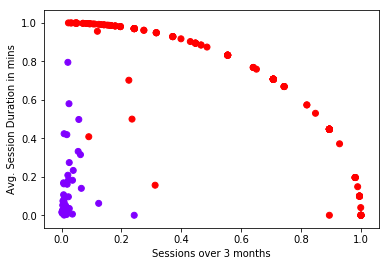

In [29]:
#Here I visualise my 2 clusters:
plt.scatter(Xn1[:,0],Xn1[:,1], c=k_mean2.labels_, cmap='rainbow')
plt.xlabel("Sessions over 3 months")
plt.ylabel("Avg. Session Duration in mins")




Text(0,0.5,'Avg. Session Duration in mins')

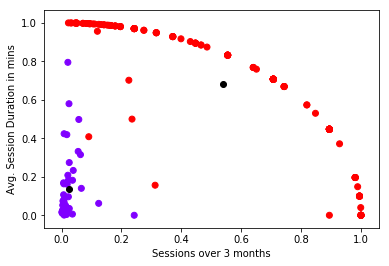

In [31]:
#Here I add my 2 centroids in black
plt.scatter(Xn1[:,0],Xn1[:,1], c=k_mean2.labels_, cmap='rainbow')
plt.scatter(clusters_2[:,0] ,clusters_2[:,1], color='black')
plt.xlabel("Sessions over 3 months")
plt.ylabel("Avg. Session Duration in mins")

Text(0,0.5,'Avg. Session Duration in mins')

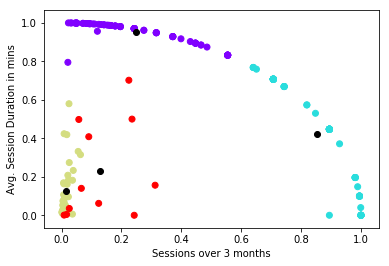

In [32]:
#Here I visualise 4 clusters
plt.scatter(Xn1[:,0],Xn1[:,1], c=k_mean4.labels_, cmap='rainbow')
plt.scatter(clusters_4[:,0] ,clusters_4[:,1], color='black')
plt.xlabel("Sessions over 3 months")
plt.ylabel("Avg. Session Duration in mins")